In [1]:
import os
import numpy as np
import pandas as pd
import pylab as pl
import datetime as dt

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GMM
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
%matplotlib inline

pd.options.display.max_columns = None
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
stations_class = pd.read_csv('Clean_Data/stations_class_all.csv')

In [3]:
stations_class.head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
0,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1
1,445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0,1
2,487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0,1
3,504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0,1
4,72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0,5


In [4]:
#stations0 = stations_class[stations_class['label']==0]
#stations1 = stations_class[stations_class['label']==1]
#stations2 = stations_class[stations_class['label']==2]
#stations3 = stations_class[stations_class['label']==3]
#stations4 = stations_class[stations_class['label']==4]
#stations5 = stations_class[stations_class['label']==5]

In [5]:
stations = [stations_class[stations_class['label']==i] for i in range(0,6)]

In [6]:
stations[0].head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
6,82,85.0,109.0,18.0,77.0,25.0,49.0,18.0,60.0,25.0,114.0,43.0,114.0,322.0,119.0,302.0,249.0,1015.0,430.0,843.0,408.0,452.0,302.0,459.0,327.0,522.0,470.0,511.0,519.0,619.0,569.0,583.0,638.0,637.0,685.0,733.0,1073.0,846.0,1027.0,693.0,807.0,417.0,614.0,360.0,428.0,219.0,331.0,136.0,242.0,0
7,83,195.0,174.0,92.0,118.0,51.0,60.0,29.0,44.0,14.0,17.0,20.0,28.0,184.0,64.0,285.0,246.0,546.0,472.0,514.0,542.0,361.0,401.0,515.0,564.0,588.0,682.0,659.0,711.0,662.0,760.0,726.0,782.0,779.0,907.0,930.0,1080.0,1046.0,1244.0,790.0,1301.0,662.0,866.0,638.0,553.0,508.0,345.0,346.0,244.0,0
9,120,43.0,179.0,30.0,89.0,14.0,50.0,12.0,25.0,6.0,8.0,23.0,4.0,145.0,6.0,445.0,28.0,714.0,81.0,608.0,127.0,284.0,137.0,253.0,168.0,248.0,150.0,250.0,206.0,226.0,194.0,214.0,206.0,182.0,251.0,190.0,255.0,241.0,622.0,241.0,597.0,182.0,413.0,160.0,339.0,107.0,262.0,90.0,213.0,0
12,143,92.0,149.0,45.0,81.0,21.0,40.0,10.0,17.0,7.0,13.0,28.0,68.0,151.0,137.0,544.0,239.0,1548.0,744.0,1160.0,554.0,562.0,417.0,558.0,356.0,471.0,425.0,457.0,482.0,501.0,452.0,459.0,516.0,518.0,552.0,585.0,782.0,705.0,1165.0,645.0,1103.0,432.0,672.0,291.0,481.0,206.0,334.0,120.0,217.0,0
13,144,47.0,56.0,11.0,33.0,4.0,22.0,4.0,9.0,0.0,3.0,15.0,9.0,49.0,15.0,178.0,88.0,328.0,319.0,239.0,193.0,245.0,230.0,286.0,259.0,380.0,375.0,410.0,404.0,402.0,421.0,426.0,435.0,408.0,398.0,375.0,448.0,341.0,420.0,260.0,333.0,158.0,190.0,109.0,131.0,105.0,156.0,178.0,79.0,0


In [7]:
dailyDiff = []

for item in stations:
    dailyDiff.append(item.mean()[1:-1])

In [8]:
#dailyDiff[0]

In [9]:
dailystartDiff = []
dailyendDiff = []

for item in dailyDiff:
    dailystartDiff.append(item[list(range(0,48,2))])
    dailyendDiff.append(item[list(range(1,48,2))])

In [10]:
dailyRange = range(0,24)

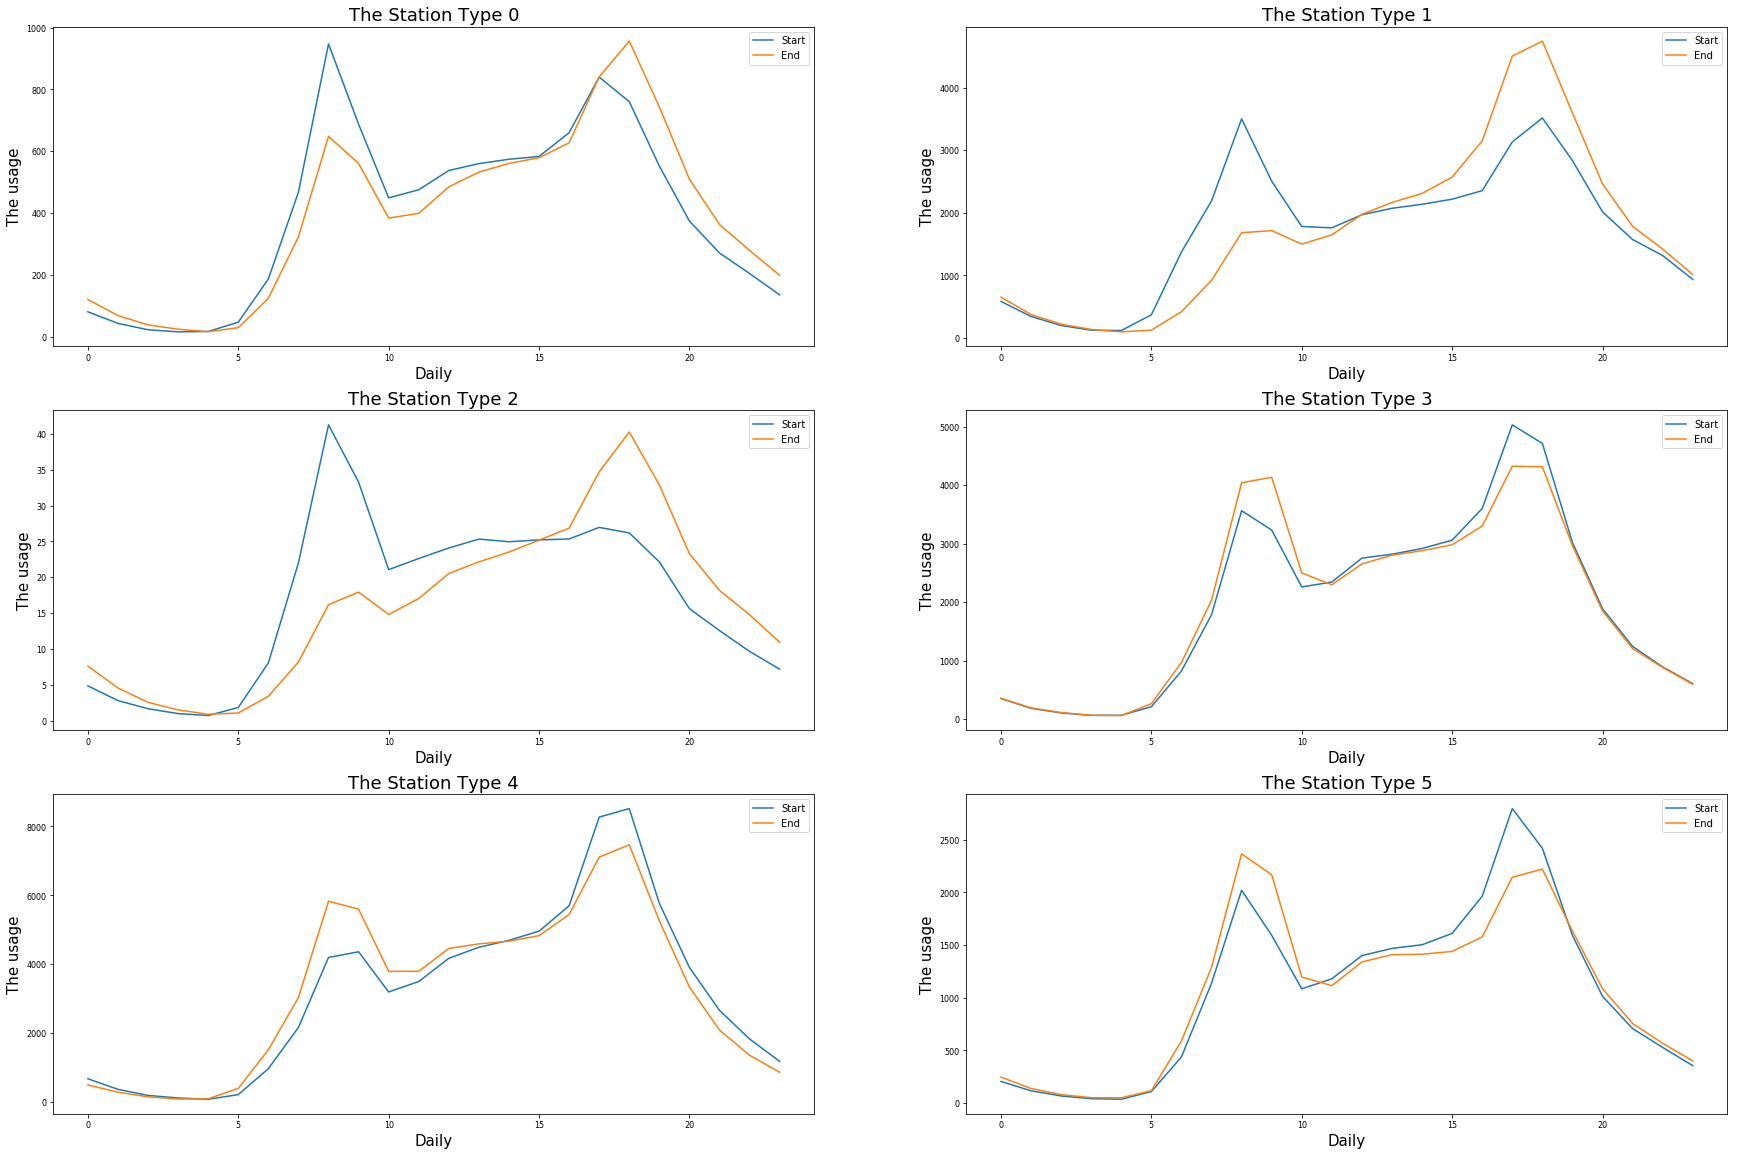

In [11]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)

    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Daily",fontsize=15)
    pl.ylabel("The usage",fontsize=15)
    ax.plot(dailyRange, dailystartDiff[i], label="Start")
    ax.plot(dailyRange, dailyendDiff[i], label="End")
    pl.legend()

#plot(dailyRange, start)
#plot(dailyRange, end)

## Better plot

add x-axis, y-axis and title to explain what is the plot?

Make the start of x-axis and y-axis is 0.

Change the font size and make it clearly.

**plot 6 start line in one figure and plot 6 end line in one figure**

Real time

In [12]:
emptyCount = pd.read_csv('Clean_Data/emptyCount.csv')

In [13]:
emptyCount.head(1)

,capacity,lat,lon,name,short_name,station_id,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23
0,37,40.722174,-73.983688,E 2 St & Avenue B,5515.02,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0


In [14]:
emptyCount.drop(['capacity', 'lat', 'lon', 'name', 'short_name'], axis=1, inplace=True)

In [15]:
emptyCount.head(1)

,station_id,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23
0,301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0


In [16]:
stations_class.head(1)

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label
0,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1


In [17]:
stations_class = stations_class.merge(emptyCount)

In [18]:
stations_class.head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23
0,301,390.0,671.0,244.0,377.0,151.0,223.0,96.0,121.0,73.0,59.0,395.0,52.0,1462.0,178.0,2461.0,630.0,3504.0,864.0,1821.0,767.0,1685.0,1010.0,1853.0,1414.0,2189.0,1889.0,2104.0,2032.0,2059.0,2124.0,2212.0,2462.0,2219.0,2935.0,2315.0,4682.0,2420.0,4738.0,2111.0,3159.0,1479.0,2003.0,1179.0,1533.0,906.0,1317.0,620.0,907.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,39.0,48.0,33.0,35.0,39.0,26.0,18.0,15.0,2.0,0.0,5.0
1,445,403.0,954.0,269.0,520.0,144.0,299.0,103.0,176.0,90.0,110.0,209.0,107.0,1234.0,227.0,2888.0,618.0,7474.0,1171.0,3140.0,1072.0,2747.0,1511.0,2611.0,1803.0,2832.0,2074.0,2677.0,2394.0,2573.0,2671.0,2899.0,3023.0,2560.0,3386.0,2746.0,4882.0,2830.0,6114.0,2354.0,4526.0,1656.0,3248.0,1111.0,2408.0,807.0,1903.0,657.0,1332.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,14.0,19.0,17.0,8.0,22.0,15.0,5.0,9.0,2.0,0.0,0.0
2,487,172.0,534.0,113.0,306.0,51.0,212.0,60.0,131.0,192.0,68.0,619.0,65.0,2181.0,303.0,3658.0,657.0,3900.0,806.0,1390.0,664.0,1057.0,799.0,1244.0,1103.0,1546.0,1413.0,1441.0,1498.0,1502.0,1845.0,1785.0,2308.0,1769.0,2823.0,2441.0,4624.0,2119.0,4401.0,1761.0,2810.0,1242.0,2438.0,811.0,1877.0,541.0,1313.0,356.0,1006.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,28.0,35.0,39.0,27.0,31.0,12.0,12.0,3.0,1.0,0.0,1.0
3,504,867.0,917.0,535.0,584.0,329.0,404.0,211.0,229.0,147.0,169.0,436.0,171.0,1487.0,801.0,3578.0,1607.0,4899.0,2686.0,2616.0,1670.0,1931.0,1749.0,2305.0,2328.0,2640.0,2534.0,2629.0,2513.0,2645.0,2822.0,3043.0,3017.0,3056.0,3515.0,3977.0,5452.0,3719.0,6188.0,3240.0,4516.0,2365.0,3006.0,2067.0,2365.0,1757.0,1818.0,1432.0,1435.0,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,37.0,44.0,34.0,30.0,24.0,21.0,13.0,13.0,4.0,0.0,2.0
4,72,127.0,273.0,78.0,137.0,61.0,93.0,32.0,35.0,68.0,38.0,126.0,190.0,431.0,511.0,906.0,990.0,3545.0,1504.0,2231.0,1649.0,1618.0,1205.0,1378.0,1135.0,1384.0,1348.0,1585.0,1444.0,1735.0,1675.0,1855.0,1785.0,2034.0,1896.0,2349.0,2251.0,2306.0,2934.0,1606.0,2023.0,826.0,1738.0,589.0,1102.0,483.0,877.0,286.0,550.0,5,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,11.0,12.0,5.0,3.0,10.0,13.0,14.0,6.0,15.0,19.0,15.0,5.0


In [19]:
emptys = [stations_class[stations_class['label']==i] for i in range(0,6)]

In [26]:
emptys[0].head()

,station_id,startCount_0,endCount_0,startCount_1,endCount_1,startCount_2,endCount_2,startCount_3,endCount_3,startCount_4,endCount_4,startCount_5,endCount_5,startCount_6,endCount_6,startCount_7,endCount_7,startCount_8,endCount_8,startCount_9,endCount_9,startCount_10,endCount_10,startCount_11,endCount_11,startCount_12,endCount_12,startCount_13,endCount_13,startCount_14,endCount_14,startCount_15,endCount_15,startCount_16,endCount_16,startCount_17,endCount_17,startCount_18,endCount_18,startCount_19,endCount_19,startCount_20,endCount_20,startCount_21,endCount_21,startCount_22,endCount_22,startCount_23,endCount_23,label,empytCount_0,empytCount_1,empytCount_2,empytCount_3,empytCount_4,empytCount_5,empytCount_6,empytCount_7,empytCount_8,empytCount_9,empytCount_10,empytCount_11,empytCount_12,empytCount_13,empytCount_14,empytCount_15,empytCount_16,empytCount_17,empytCount_18,empytCount_19,empytCount_20,empytCount_21,empytCount_22,empytCount_23
6,82,85.0,109.0,18.0,77.0,25.0,49.0,18.0,60.0,25.0,114.0,43.0,114.0,322.0,119.0,302.0,249.0,1015.0,430.0,843.0,408.0,452.0,302.0,459.0,327.0,522.0,470.0,511.0,519.0,619.0,569.0,583.0,638.0,637.0,685.0,733.0,1073.0,846.0,1027.0,693.0,807.0,417.0,614.0,360.0,428.0,219.0,331.0,136.0,242.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2.0,2.0,5.0,17.0,6.0,2.0,5.0,2.0
7,83,195.0,174.0,92.0,118.0,51.0,60.0,29.0,44.0,14.0,17.0,20.0,28.0,184.0,64.0,285.0,246.0,546.0,472.0,514.0,542.0,361.0,401.0,515.0,564.0,588.0,682.0,659.0,711.0,662.0,760.0,726.0,782.0,779.0,907.0,930.0,1080.0,1046.0,1244.0,790.0,1301.0,662.0,866.0,638.0,553.0,508.0,345.0,346.0,244.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,120,43.0,179.0,30.0,89.0,14.0,50.0,12.0,25.0,6.0,8.0,23.0,4.0,145.0,6.0,445.0,28.0,714.0,81.0,608.0,127.0,284.0,137.0,253.0,168.0,248.0,150.0,250.0,206.0,226.0,194.0,214.0,206.0,182.0,251.0,190.0,255.0,241.0,622.0,241.0,597.0,182.0,413.0,160.0,339.0,107.0,262.0,90.0,213.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,20.0,14.0,17.0,7.0,23.0,13.0,22.0,27.0,7.0,2.0,0.0
12,143,92.0,149.0,45.0,81.0,21.0,40.0,10.0,17.0,7.0,13.0,28.0,68.0,151.0,137.0,544.0,239.0,1548.0,744.0,1160.0,554.0,562.0,417.0,558.0,356.0,471.0,425.0,457.0,482.0,501.0,452.0,459.0,516.0,518.0,552.0,585.0,782.0,705.0,1165.0,645.0,1103.0,432.0,672.0,291.0,481.0,206.0,334.0,120.0,217.0,0,14.0,4.0,6.0,3.0,6.0,20.0,39.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,28.0,14.0
13,144,47.0,56.0,11.0,33.0,4.0,22.0,4.0,9.0,0.0,3.0,15.0,9.0,49.0,15.0,178.0,88.0,328.0,319.0,239.0,193.0,245.0,230.0,286.0,259.0,380.0,375.0,410.0,404.0,402.0,421.0,426.0,435.0,408.0,398.0,375.0,448.0,341.0,420.0,260.0,333.0,158.0,190.0,109.0,131.0,105.0,156.0,178.0,79.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
#emptys[0]

In [21]:
emptysHour = []

for item in emptys:
    emptysHour.append(item.mean()[50:])

In [22]:
#emptysHour[0]

In [23]:
dailyRange = range(0,24)

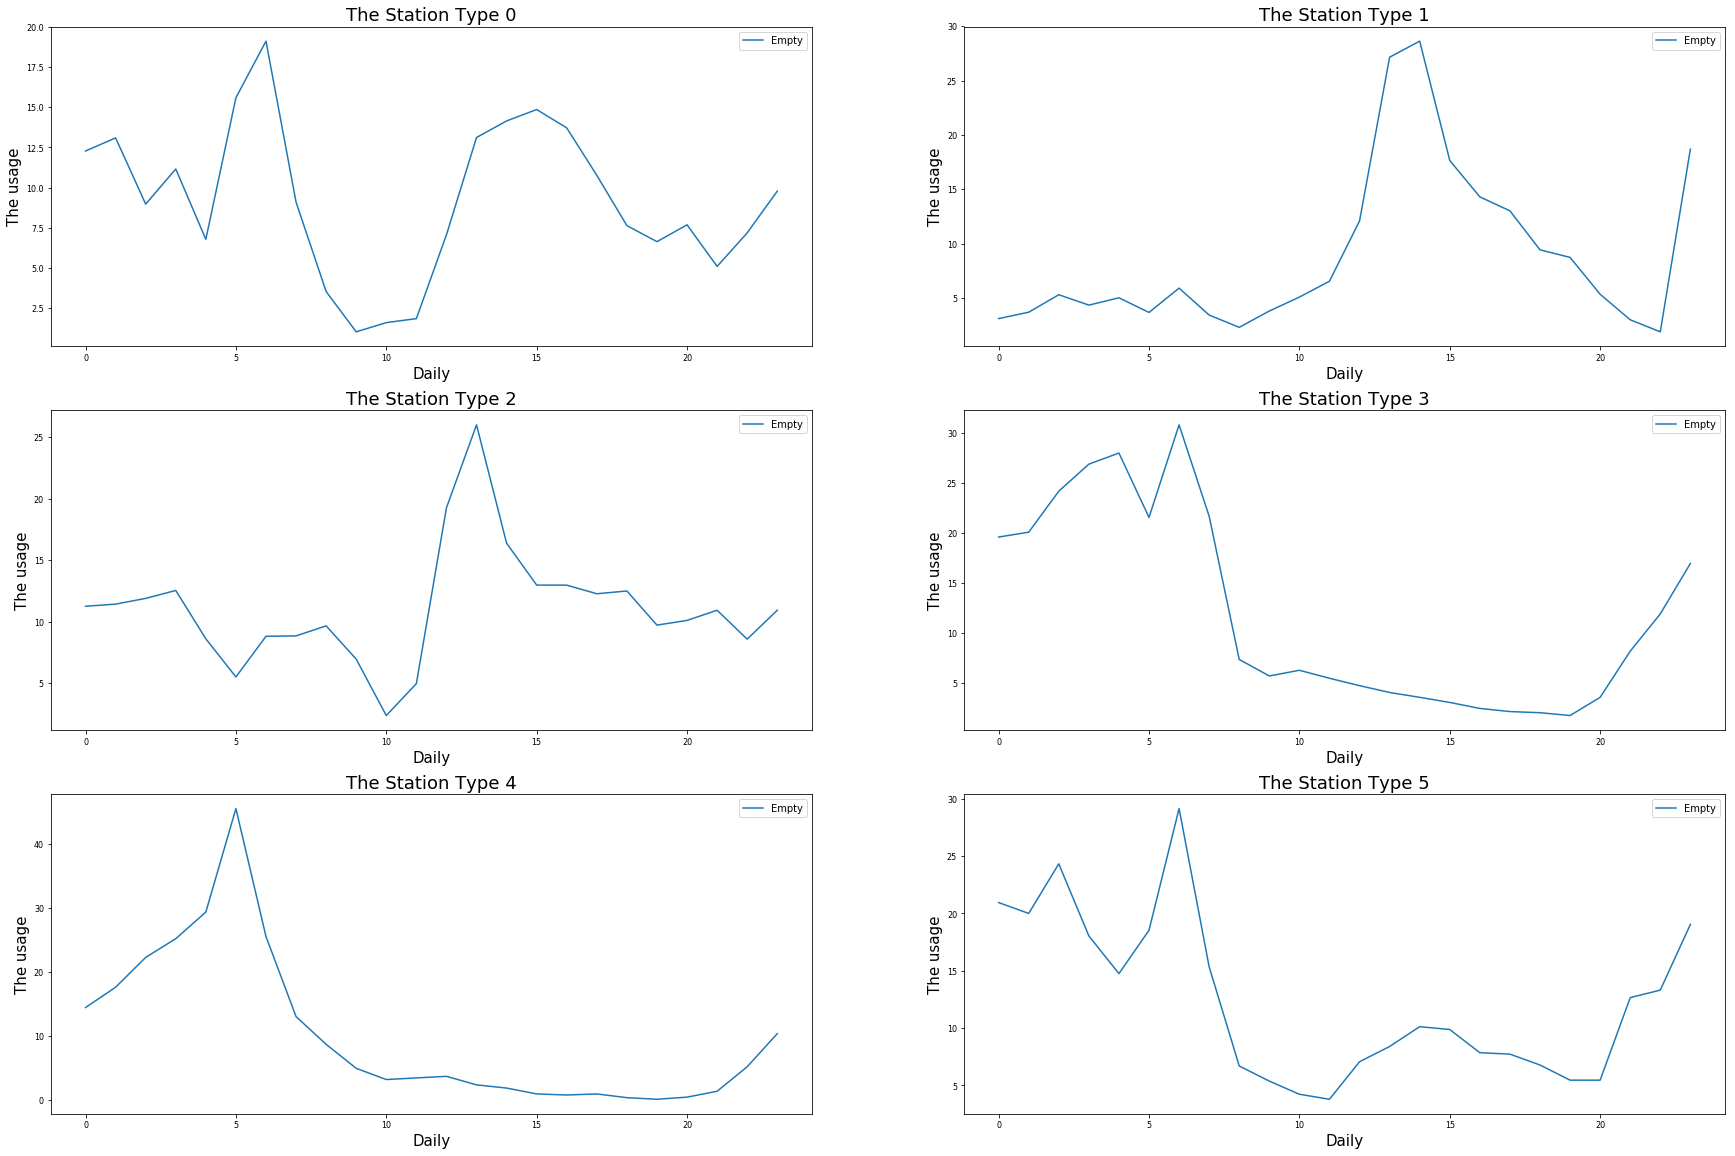

In [24]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)

    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Daily",fontsize=15)
    pl.ylabel("The usage",fontsize=15)
    ax.plot(dailyRange, emptysHour[i], label="Empty")
    #ax.plot(dailyRange, dailyendDiff[i], label="End")
    pl.legend()

## Better plot

add x-axis, y-axis and title to explain what is the plot?

Make the start of x-axis and y-axis is 0.

Change the font size and make it clearly.

**plot 6 empty line in one figure**

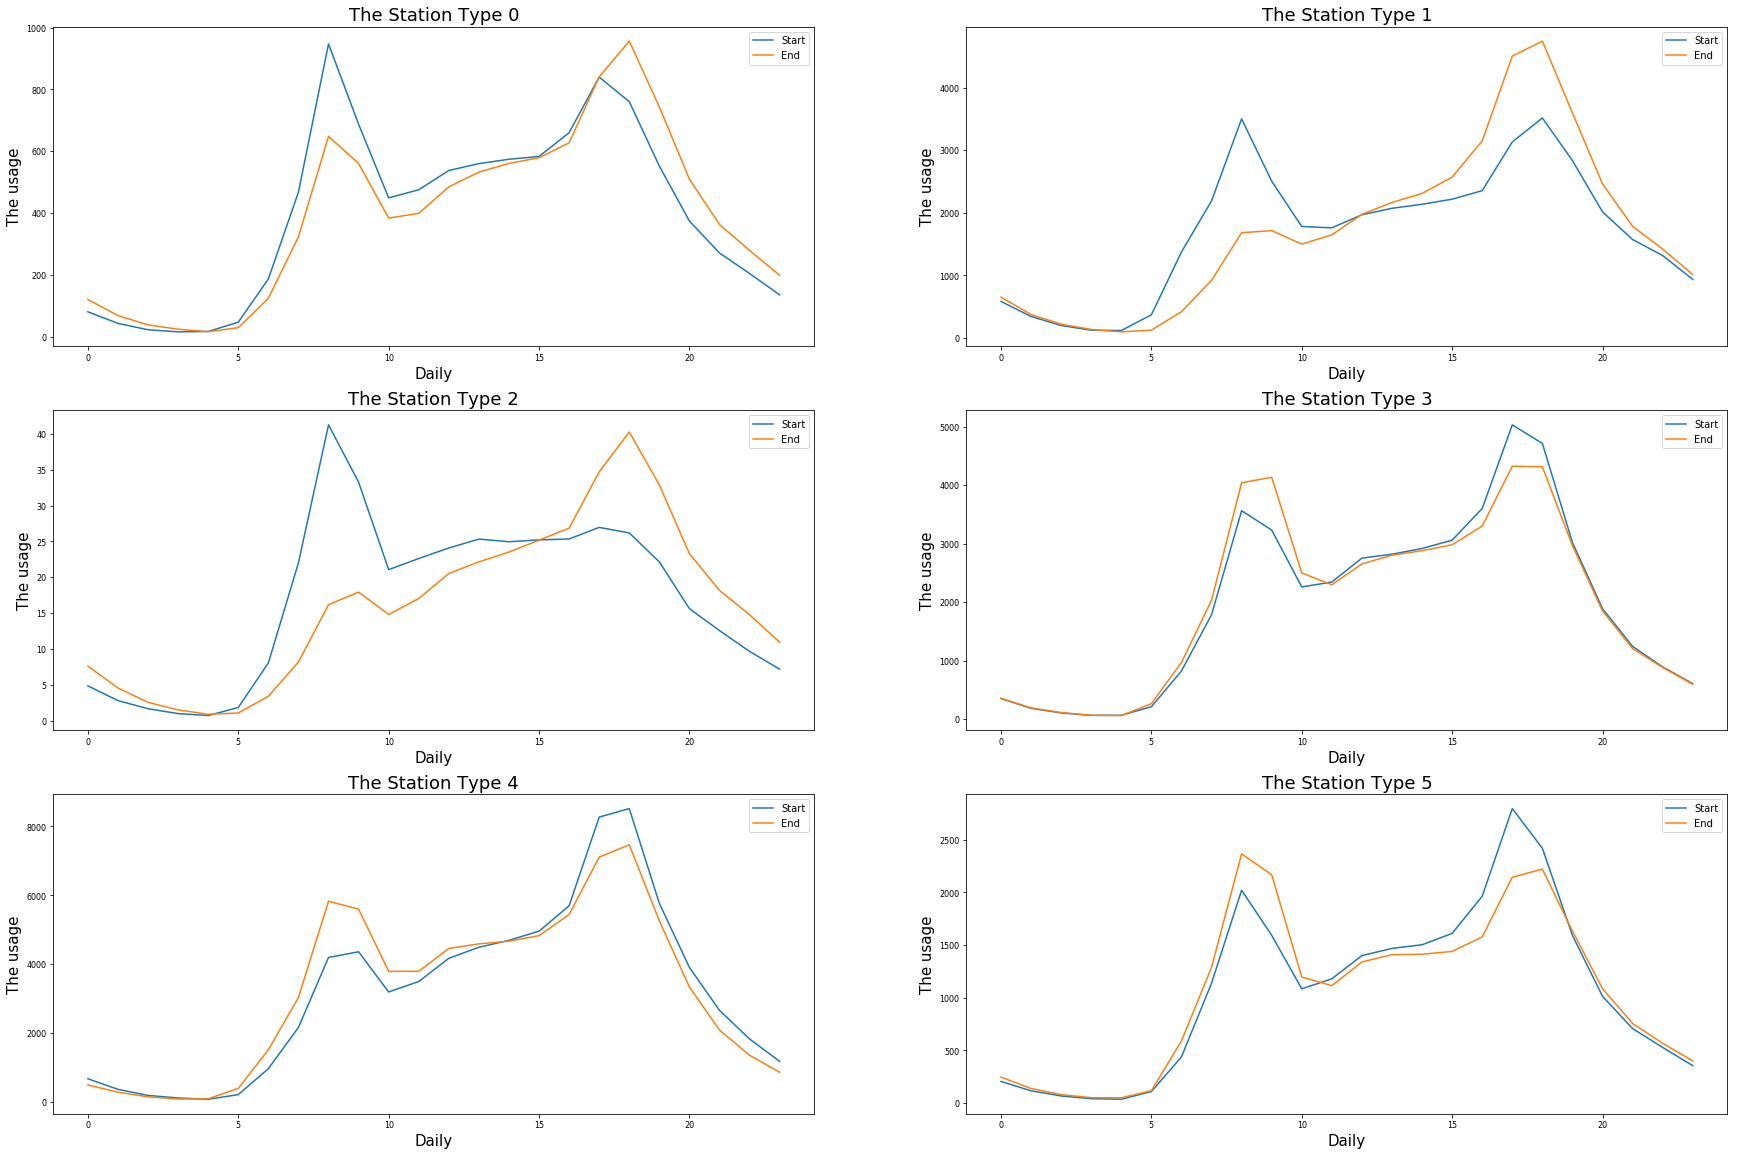

In [30]:
fig = pl.figure(figsize=(30,20))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)

    ax.set_title("The Station Type " + str(i),fontsize=18)
    pl.xticks(fontsize=8)
    pl.yticks(fontsize=8)
    pl.xlabel("Daily",fontsize=15)
    pl.ylabel("The usage",fontsize=15)
    ax.plot(dailyRange, dailystartDiff[i], label="Start")
    ax.plot(dailyRange, dailyendDiff[i], label="End")
    #ax.plot(dailyRange, emptysHour[i]*50, label="Empty")
    #ax.plot(dailyRange, dailyendDiff[i], label="End")
    pl.legend()

In [30]:
#dailyendDiff[0]

In [31]:
#dailystartDiff[0]

In [31]:
#dailyDiff0 = stations0.mean()[1:-1]
#dailyDiff1 = stations1.mean()[1:-1]
#dailyDiff2 = stations2.mean()[1:-1]
#dailyDiff3 = stations3.mean()[1:-1]
#dailyDiff4 = stations4.mean()[1:-1]
#dailyDiff5 = stations5.mean()[1:-1]

In [35]:
# start0 = []
# end0 = []
# start1 = []
# end1 = []
# start2 = []
# end2 = []
# start3 = []
# end3 = []
# start4 = []
# end4 = []
# start5 = []
# end5 = []


# for i in range(0,48,2):
#     start0.append(dailyDiff0[i])
#     end0.append(dailyDiff0[i+1])
    
#     start1.append(dailyDiff1[i])
#     end1.append(dailyDiff1[i+1])
    
#     start2.append(dailyDiff2[i])
#     end2.append(dailyDiff2[i+1])
    
#     start3.append(dailyDiff3[i])
#     end3.append(dailyDiff3[i+1])
    
#     start4.append(dailyDiff4[i])
#     end4.append(dailyDiff4[i+1])
    
#     start5.append(dailyDiff5[i])
#     end5.append(dailyDiff5[i+1])


#start = []
#start.append(start0).append(start1).append(start2).append(start3).append(start4).append(start5)
#end = []
#end.append(end0).append(end1).append(end2).append(end3).append(end4).append(end5)

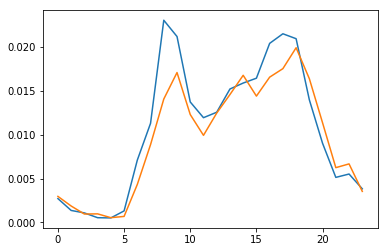

In [40]:
plot(dailyRange, start0)
plot(dailyRange, end0)

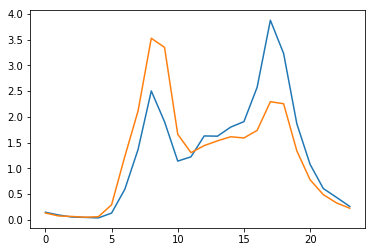

In [41]:
plot(dailyRange, start1)
plot(dailyRange, end1)

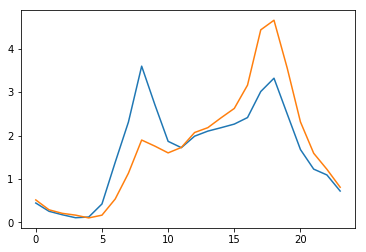

In [42]:
plot(dailyRange, start2)
plot(dailyRange, end2)

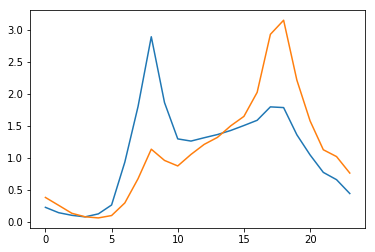

In [43]:
plot(dailyRange, start3)
plot(dailyRange, end3)

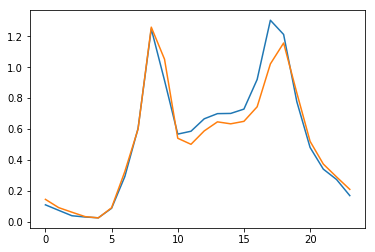

In [44]:
plot(dailyRange, start4)
plot(dailyRange, end4)

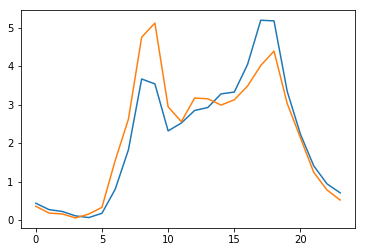

In [45]:
plot(dailyRange, start5)
plot(dailyRange, end5)